# Summary of the Ripple transaction history from 01/06/2017 - 29/08/2017
1. Cumulative number of transactions over time

2. Distribution of the number of transactions per user

3. Fraction of senders that have at least 1, 2, 3, ..., 200 transactions

4. Fraction of senders that are also receivers and vice versa (This is just a bar chart with 2 bars)

5. Popularity of destinations

6. Popularity of currencies

7. Distribution of transaction amount per currency

In [12]:
#LOAD LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
%matplotlib inline

In [2]:
#LOAD DATA
start_date = datetime.date(2017,6,1)
end_date = datetime.date(2017,8,29)
date_list = pd.date_range(start_date,end_date,freq="1D")

files = []
for day in date_list:
    #print("Current date: {}".format(day.strftime("%Y-%m-%d")))
    this_day = day.strftime("%Y-%m-%d")
    next_day = (day+datetime.timedelta(days=1)).strftime("%Y-%m-%d")
    files.append(pd.read_csv("Ripple_transactions_{}_to_{}.csv".format(this_day,next_day),index_col=0))

dataset = pd.concat(files)

In [4]:
#BASIC SUMMARY
#2.5 million transactions
#152 different currencies
# 132,131 receivers
# 7309 senders
dataset.describe()

,Amount,Currency,Destination,Sender,Timestamp
count,2487188.0,2487188,2487188,112689,2487188
unique,481654.0,152,132131,7309,1316355
top,1.0,XRP,rwXZe6N3YMtKuGkZDjoqeS6KE3am3U7br,rnHScgV6wSP9sR25uYWiMo3QYNA5ybQ7cH,2017-06-26T16:57:20+00:00
freq,379511.0,2233987,344662,12378,78


# Transactions over time

In [5]:
#GROUP DATA BY DATE
dataset.loc[:,'Timestamp'] = pd.to_datetime(dataset['Timestamp'])
dataset['Date'] = dataset['Timestamp'].apply(lambda x: x.date())

grouped_d = dataset.groupby('Date')['Amount'] #`grouped_d` = GROUPED by Date

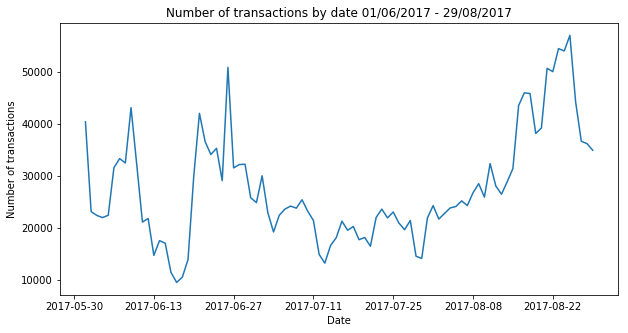

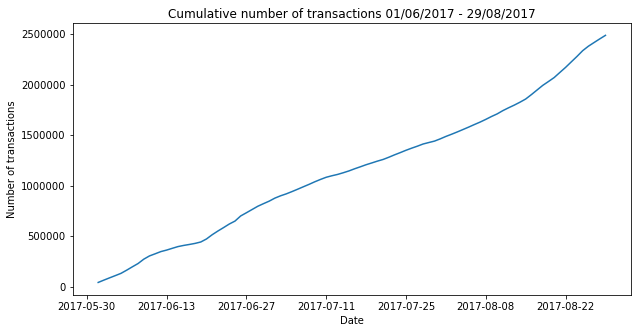

In [16]:
grouped_d_agg = grouped_d.size().values #Aggregated

grouped_d_agg_sum = np.cumsum(grouped_d_agg)

plt.figure(figsize=(10,5))
plt.plot(date_list,grouped_d_agg)
plt.xlabel('Date')
plt.ylabel('Number of transactions')
plt.title('Number of transactions by date 01/06/2017 - 29/08/2017')

plt.figure(figsize=(10,5))
plt.plot(date_list,grouped_d_agg_sum)
plt.xlabel('Date')
plt.ylabel('Number of transactions')
plt.title('Cumulative number of transactions 01/06/2017 - 29/08/2017')

# Distribution of number of transactions by user

In [17]:
grouped_s = dataset.groupby('Sender')
grouped_d = dataset.groupby('Destination')

In [58]:
grouped_s_agg = grouped_s.size()
grouped_d_agg = grouped_d.size()

In [22]:
print("Number of senders: {} \nNumber of receivers: {}".format(len(grouped_s_agg),len(grouped_d_agg)))

Number of senders: 7309 
Number of receivers: 132131


In [98]:
#DESCRIBE SENDER DISTRIBUTION
#max = 12,378
#mean = 1
grouped_s_agg.describe()

count     7309.000000
mean        15.417841
std        181.347658
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max      12378.000000
dtype: float64

In [99]:
#DESCRIBE RECEIVER DISTRIBUTION
#max = 344,662
#mean = 2
grouped_d_agg.describe()

count    132131.000000
mean         18.823652
std        1061.308109
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max      344662.000000
dtype: float64

<Container object of 200 artists>

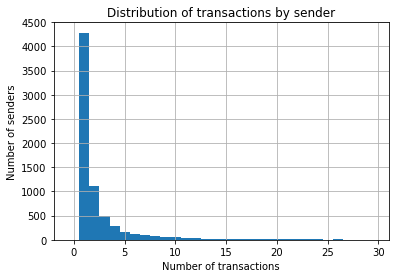

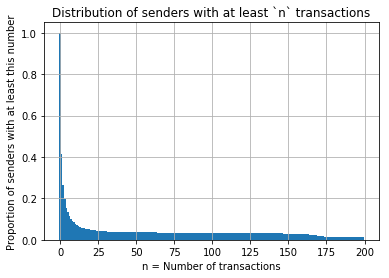

In [113]:
#Plotting histograms
freq, bin_edges = np.histogram(grouped_s_agg.values,bins=range(len(grouped_s_agg)))
proportion = freq/len(grouped_s_agg)
at_least = 1-np.cumsum(proportion)

plt.figure()
plt.xlabel('Number of transactions')
plt.ylabel('Number of senders')
plt.title('Distribution of transactions by sender')
plt.grid()
plt.bar(bin_edges[0:30],freq[0:30],width=1)

plt.figure()
plt.xlabel('n = Number of transactions')
plt.ylabel('Proportion of senders with at least this number')
plt.title('Distribution of senders with at least `n` transactions')
plt.grid()
plt.bar(bin_edges[0:200],at_least[0:200],width=1)

<Container object of 200 artists>

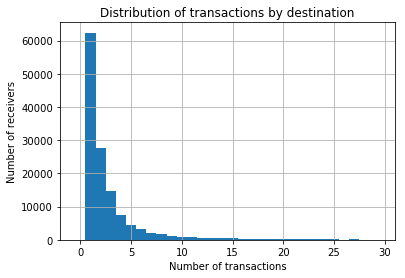

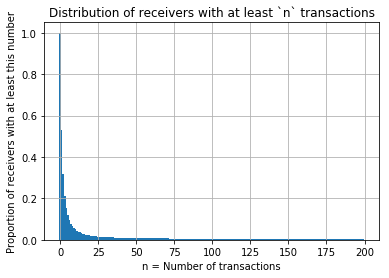

In [112]:
freq, bin_edges = np.histogram(grouped_d_agg.values,bins=range(len(grouped_d_agg)))
proportion = freq/len(grouped_d_agg)
at_least = 1-np.cumsum(proportion)

plt.figure()
plt.xlabel('Number of transactions')
plt.ylabel('Number of receivers')
plt.title('Distribution of transactions by destination')
plt.grid()
plt.bar(bin_edges[0:30],freq[0:30],width=1)

plt.figure()
plt.xlabel('n = Number of transactions')
plt.ylabel('Proportion of receivers with at least this number')
plt.title('Distribution of receivers with at least `n` transactions')
plt.grid()
plt.bar(bin_edges[0:200],at_least[0:200],width=1)

> Cumulative distribution of senders has a fatter tail, there are a greater prop. of senders with a large number of transactions, although there are also fewer senders